<a href="https://colab.research.google.com/github/sathwikreddy2004/CAPESTONE-PROJECT/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/epileptic/Epileptic Seizure Recognition.csv')
data = data.drop(columns = ["Unnamed"])

# Separate Data into Features and Target
X = data.drop(columns = ['y'])
y = data['y']

In [ ]:
cols = list(X.columns)

In [ ]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-8.000000,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,35.000000,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,2047.000000,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


<Axes: >

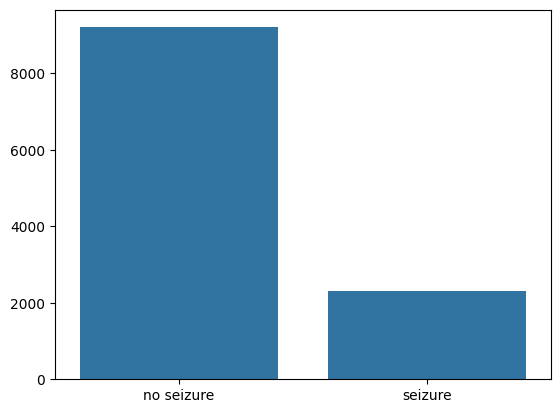

In [ ]:
labels = ['no seizure','seizure']

seizure = y[y.values ==1].shape[0]
no_seizure = y[y.values > 1].shape[0]

sn.barplot(x=labels, y=[no_seizure,seizure])

In [ ]:
y = y.values
y[y>1]=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
X_train.shape, X_test.shape

((9200, 178), (2300, 178))

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,...,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03,9.200000e+03
mean,1.544658e-18,1.129531e-17,7.723291e-19,1.312959e-17,-3.861645e-18,-5.406303e-18,6.950962e-18,-5.406303e-18,7.723291e-19,1.467425e-17,...,-6.178632e-18,1.544658e-18,9.267949e-18,-1.158494e-17,-1.930823e-18,-3.861645e-18,-1.390192e-17,-6.178632e-18,-1.544658e-18,6.564797e-18
std,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,...,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00
min,-1.079752e+01,-1.081527e+01,-1.102414e+01,-1.131078e+01,-1.107834e+01,-1.093509e+01,-1.138279e+01,-1.092100e+01,-1.126989e+01,-1.163773e+01,...,-1.118917e+01,-1.123377e+01,-1.104191e+01,-9.575127e+00,-1.000762e+01,-1.094026e+01,-1.117532e+01,-1.075829e+01,-1.038055e+01,-1.090271e+01
25%,-2.466829e-01,-2.527488e-01,-2.621030e-01,-2.749316e-01,-2.856414e-01,-2.945155e-01,-2.983157e-01,-3.015324e-01,-3.021362e-01,-3.042785e-01,...,-2.748110e-01,-2.757815e-01,-2.631322e-01,-2.514023e-01,-2.472343e-01,-2.528976e-01,-2.555290e-01,-2.596462e-01,-2.596270e-01,-2.588051e-01
50%,2.521549e-02,2.704335e-02,2.190344e-02,1.467454e-02,1.755965e-04,-1.334928e-02,-1.154079e-02,-1.185442e-02,-1.334938e-02,-1.047146e-02,...,3.338850e-03,8.605943e-03,1.171477e-02,1.314224e-02,2.209839e-02,1.871509e-02,2.229769e-02,2.015536e-02,1.881948e-02,1.719246e-02
75%,2.793814e-01,2.816690e-01,2.817391e-01,2.796334e-01,2.673524e-01,2.678169e-01,2.565314e-01,2.593335e-01,2.631487e-01,2.583307e-01,...,2.693952e-01,2.748410e-01,2.746119e-01,2.659292e-01,2.738659e-01,2.785185e-01,2.820052e-01,2.817090e-01,2.791064e-01,2.691902e-01
max,1.027460e+01,1.021207e+01,1.031865e+01,9.990683e+00,9.481845e+00,1.138950e+01,1.279982e+01,1.265385e+01,1.261340e+01,1.282952e+01,...,7.174768e+00,8.443417e+00,8.514046e+00,6.991239e+00,8.488513e+00,1.031047e+01,1.190241e+01,1.252607e+01,1.246417e+01,1.156109e+01


In [ ]:
# Instantiate classifier with its default hyperparameters
svc=SVC()

# Fit classifier to training set
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred):0.4f}')

Accuracy score: 0.9757


[[1840   14]
 [  42  404]]


<Axes: title={'center': 'Confusion Matrix for Seizure Dataset'}>

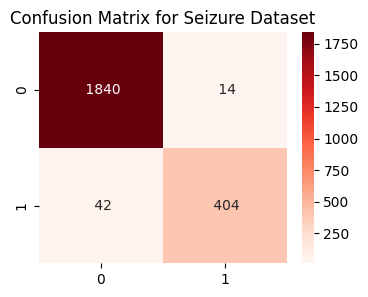

In [ ]:
%matplotlib inline


# Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix for Seizure Dataset')
sn.heatmap(cf_matrix, annot=True, fmt=' ', cmap='Reds')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1854
           1       0.97      0.91      0.94       446

    accuracy                           0.98      2300
   macro avg       0.97      0.95      0.96      2300
weighted avg       0.98      0.98      0.98      2300



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred):0.4f}')

Accuracy score: 0.9417


[[1799   55]
 [  79  367]]


<Axes: title={'center': 'Confusion Matrix for Seizure Dataset'}>

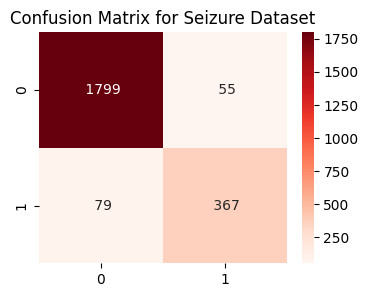

In [ ]:

# Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix for Seizure Dataset')
sn.heatmap(cf_matrix, annot=True, fmt=' ', cmap='Reds')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1854
           1       0.87      0.82      0.85       446

    accuracy                           0.94      2300
   macro avg       0.91      0.90      0.90      2300
weighted avg       0.94      0.94      0.94      2300



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred):0.4f}')

In [ ]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix for Seizure Dataset')
sn.heatmap(cf_matrix, annot=True, fmt=' ', cmap='Reds')

In [ ]:
print(classification_report(y_test, y_pred))